## Version_1

## Importation des packages

In [2]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\All_Da\Projet_1\Projet_1_AllDataers\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install matplotlib

You should consider upgrading via the 'd:\All_Da\Projet_1\Projet_1_AllDataers\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install seaborn

You should consider upgrading via the 'd:\All_Da\Projet_1\Projet_1_AllDataers\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
Files=[file for file in os.listdir(r'D:\All_Da\Projet_1\Data')]
for file in Files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [7]:
Path=r'D:\All_Da\Projet_1\Data'

#Créer une base de données vide
df=pd.DataFrame()

for file in Files:
    current_data=pd.read_csv(Path+'/'+file)
    df=pd.concat([df,current_data])
    print(df)

      Order ID                     Product Quantity Ordered Price Each  \
0       176558        USB-C Charging Cable                2      11.95   
1          NaN                         NaN              NaN        NaN   
2       176559  Bose SoundSport Headphones                1      99.99   
3       176560                Google Phone                1        600   
4       176560            Wired Headphones                1      11.99   
...        ...                         ...              ...        ...   
18378   194090                Google Phone                1        600   
18379   194091       AA Batteries (4-pack)                1       3.84   
18380   194092      AAA Batteries (4-pack)                2       2.99   
18381   194093       AA Batteries (4-pack)                1       3.84   
18382   194094    Lightning Charging Cable                1      14.95   

           Order Date                        Purchase Address  
0      04/19/19 08:46            917 1st St, Da

In [8]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [9]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [10]:
## Renommons les variables

In [11]:
df.rename(columns={'Order ID': 'Order_ID','Quantity Ordered':'Quantity_Ordered','Price Each':'Price_Each', 'Order Date':'Order_Date', 'Purchase Address':'Purchase_Address'}, inplace=True)
# df.reset_index('Produit', inplace=True)
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order_ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity_Ordered  186305 non-null  object
 3   Price_Each        186305 non-null  object
 4   Order_Date        186305 non-null  object
 5   Purchase_Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [13]:
df.isna().sum()

Order_ID            545
Product             545
Quantity_Ordered    545
Price_Each          545
Order_Date          545
Purchase_Address    545
dtype: int64

In [14]:
prct_manquants_df=df.isna().sum()*100/df.isna().shape[0]
round(prct_manquants_df.sort_values(),2)

Order_ID            0.29
Product             0.29
Quantity_Ordered    0.29
Price_Each          0.29
Order_Date          0.29
Purchase_Address    0.29
dtype: float64

**Pourcentage de valeurs manquantes est faible. On peut donc les supprimer vu que ça n'aura pas d'impact sur nos données**

In [15]:
df=df.dropna(how='all')

In [16]:
df.isnull().sum()

Order_ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
dtype: int64

In [17]:
df.shape

(186305, 6)

In [18]:
df.nunique()

Order_ID            178438
Product                 20
Quantity_Ordered        10
Price_Each              24
Order_Date          142396
Purchase_Address    140788
dtype: int64

### Création de la variable Month

In [19]:
def month(x):
    return x.split('/')[0]

In [20]:
df['Month']=df['Order_Date'].apply(month)
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [21]:
df['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

**Présence de 'Order Date' dans les Mois. Nous allons donc le supprimer**

In [22]:
df=df[df['Month']!='Order Date']
df['Month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [23]:
df.dtypes

Order_ID            object
Product             object
Quantity_Ordered    object
Price_Each          object
Order_Date          object
Purchase_Address    object
Month               object
dtype: object

### Conversion des types de certaines variables dans dans un bon format


In [24]:
df['Month']=df['Month'].astype(int)
df['Price_Each']=df['Price_Each'].astype(float)
df['Quantity_Ordered']=df['Quantity_Ordered'].astype(int)
df.dtypes

Order_ID             object
Product              object
Quantity_Ordered      int32
Price_Each          float64
Order_Date           object
Purchase_Address     object
Month                 int32
dtype: object

## Calcul du chiffre d'afffaire

In [25]:
df['Sales']=df['Quantity_Ordered']*df['Price_Each']
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


## Ventes par Mois

In [26]:
df.groupby('Month')['Sales'].sum()

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

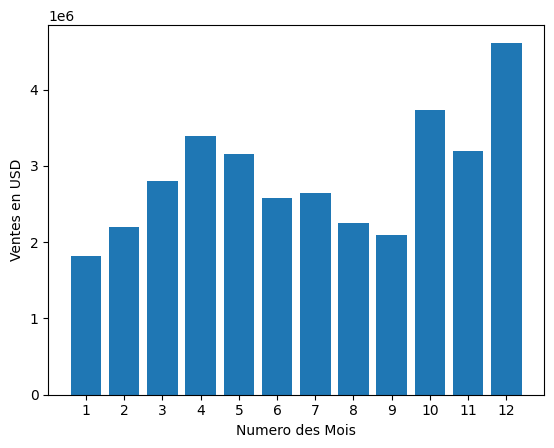

In [27]:
Months=range(1,13)
plt.bar(Months,df.groupby('Month')['Sales'].sum())
plt.xticks(Months)
plt.ylabel('Ventes en USD')
plt.xlabel('Numero des Mois')
plt.show()

**Le Meilleur CA a été réalisé sur le mois de Décembre** 

In [28]:
df['Price_Each'].unique()

array([  11.95,   99.99,  600.  ,   11.99, 1700.  ,   14.95,  389.99,
          3.84,  150.  ,    2.99,  700.  ,  300.  ,  149.99,  109.99,
        999.99,  400.  ,  379.99])

In [29]:
df['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [30]:
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Création de la variable City

In [31]:
def city(x):
    return x.split(',')[1]

In [32]:
df['city']=df['Purchase_Address'].apply(city)
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


### Ventes Par Ville

In [33]:
df.groupby('city')['city'].count()

city
Atlanta          14881
Austin            9905
Boston           19934
Dallas           14820
Los Angeles      29605
New York City    24876
Portland         12465
San Francisco    44732
Seattle          14732
Name: city, dtype: int64

In [34]:
df.groupby('city')['city'].count().index

Index([' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles',
       ' New York City', ' Portland', ' San Francisco', ' Seattle'],
      dtype='object', name='city')

In [35]:
df.groupby('city')['city'].count().values

array([14881,  9905, 19934, 14820, 29605, 24876, 12465, 44732, 14732],
      dtype=int64)

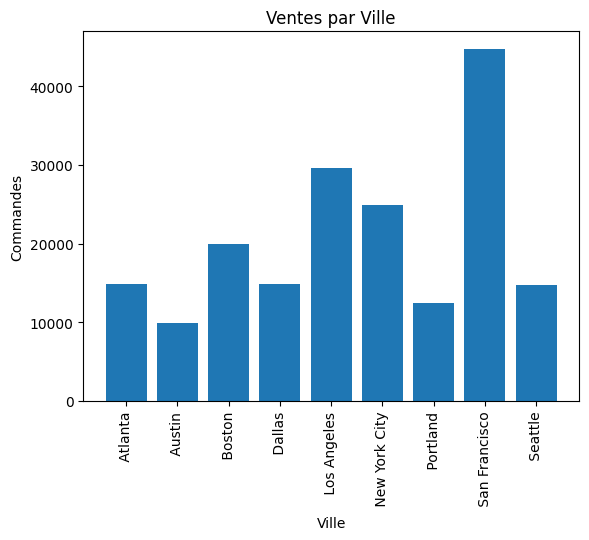

In [36]:
plt.bar(df.groupby('city')['city'].count().index,df.groupby('city')['city'].count().values)
plt.xticks(rotation='vertical')
plt.ylabel('Commandes')
plt.xlabel('Ville')
plt.title("Ventes par Ville")
plt.show()

**La ville dans laquelle nous avons le plus de commandes est San Francisco**

### Création de la variable Hour


In [37]:
df['Hour']= pd.to_datetime(df['Order_Date']).dt.hour

C:\Users\User\AppData\Local\Temp\ipykernel_20828\1975215751.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour']= pd.to_datetime(df['Order_Date']).dt.hour


In [38]:
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,city,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [39]:
keys=[]
hours=[]
for key,hour in df.groupby('Hour'):
    keys.append(key)
    hours.append(len(hour))
hours

[3910,
 2350,
 1243,
 831,
 854,
 1321,
 2482,
 4011,
 6256,
 8748,
 10944,
 12411,
 12587,
 12129,
 10984,
 10175,
 10384,
 10899,
 12280,
 12905,
 12228,
 10921,
 8822,
 6275]

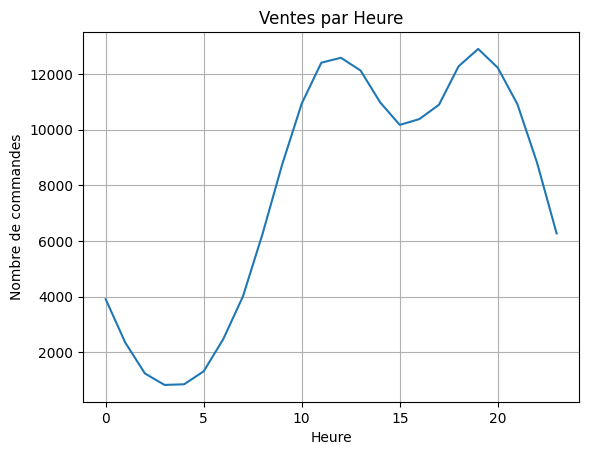

In [40]:
plt.grid()
plt.plot(keys,hours)
plt.xlabel('Heure')
plt.ylabel('Nombre de commandes')
plt.title("Ventes par Heure")
plt.show()

###  Quantité Vendue par Produit

In [41]:
df.groupby('Product')['Quantity_Ordered'].sum()

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity_Ordered, dtype: int32

Text(0.5, 1.0, 'Quantité Vendue par Produit')

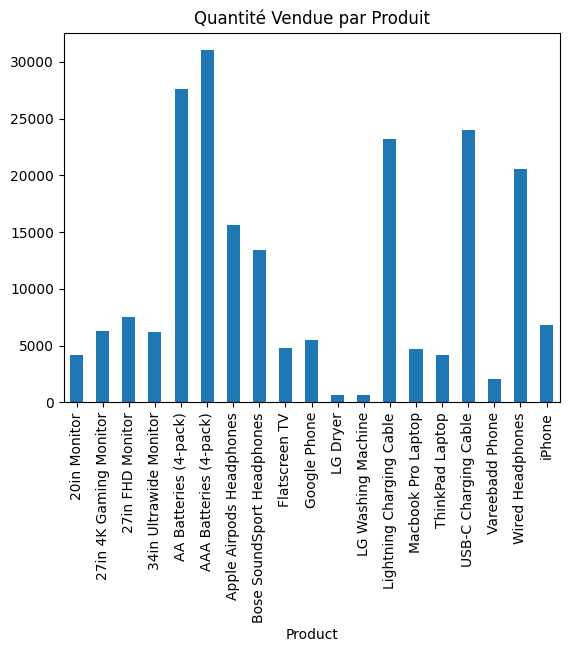

In [42]:
df.groupby('Product')['Quantity_Ordered'].sum().plot(kind='bar')
plt.title("Quantité Vendue par Produit")

**Le produit le plus vendu est  'AA Batteries (4-pack)'**

### Prix de vente de chaque Produit

In [43]:
df.groupby('Product')['Price_Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price_Each, dtype: float64

## Prix Moyen par la Quantité vendue


In [44]:
Products = df.groupby('Product')['Quantity_Ordered'].sum().index
Quantity=df.groupby('Product')['Quantity_Ordered'].sum()
Prices=df.groupby('Product')['Price_Each'].mean()

#### Convertir les données en tableaux numpy


In [45]:
Products = np.array(Products)
Quantity = np.array(Quantity)
Prices = np.array(Prices)

C:\Users\User\AppData\Local\Temp\ipykernel_20828\3111821251.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(Products, rotation='vertical',size=8)


Text(0.5, 1.0, 'Prix Moyen du produit par la Quantité vendue')

<Figure size 4000x2400 with 0 Axes>

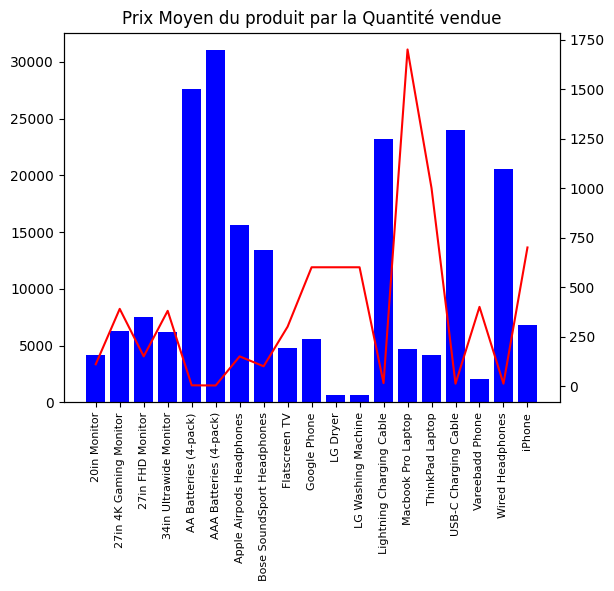

In [46]:
plt.figure(figsize=(40,24))
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(Products,Quantity,color='b')
ax2.plot(Products, Prices, 'r-')
ax1.set_xticklabels(Products, rotation='vertical',size=8)
plt.title("Prix Moyen du produit par la Quantité vendue")